In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from math import sqrt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from pylab import rcParams
import itertools


import warnings
warnings.filterwarnings('ignore')

# Data Loading


In [3]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\train (1).csv")
df

,date,store,item,sales
0,01-01-2013,1,1,13
1,02-01-2013,1,1,11
2,03-01-2013,1,1,14
3,04-01-2013,1,1,13
4,05-01-2013,1,1,10
...,...,...,...,...
89995,06-06-2014,10,5,20
89996,07-06-2014,10,5,17
89997,08-06-2014,10,5,26
89998,09-06-2014,10,5,27


# Exploaratory data analysis

In [4]:
df.dtypes

date     object
store     int64
item      int64
sales     int64
dtype: object

In [5]:
df.shape

(90000, 4)

In [6]:
df.describe()

,store,item,sales
count,90000.00000,90000.000000,90000.000000
mean,5.43500,2.971111,31.651789
std,2.84122,1.403673,19.506872
min,1.00000,1.000000,0.000000
25%,3.00000,2.000000,18.000000
50%,5.00000,3.000000,26.000000
75%,8.00000,4.000000,40.000000
max,10.00000,5.000000,150.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90000 entries, 0 to 89999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    90000 non-null  object
 1   store   90000 non-null  int64 
 2   item    90000 non-null  int64 
 3   sales   90000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ MB


In [8]:
df.isna().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [9]:
# Let's check the time periods 
df["date"].min(), df["date"].max() 

('01-01-2013', '31-12-2017')

array([[<AxesSubplot:title={'center':'sales'}>]], dtype=object)

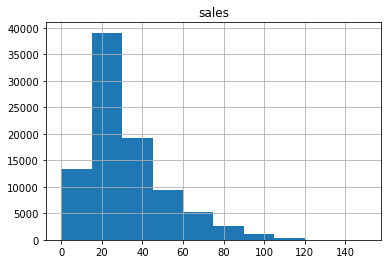

In [10]:
df.hist(column='sales')

In [11]:
df['store'].nunique()

10

In [12]:
#Checking Duplicates
df[df.duplicated()]

,date,store,item,sales


In [13]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date')

,store,item,sales
date,,,
2013-01-01,1,1,13
2013-02-01,1,1,11
2013-03-01,1,1,14
2013-04-01,1,1,13
2013-05-01,1,1,10
...,...,...,...
2014-06-06,10,5,20
2014-07-06,10,5,17
2014-08-06,10,5,26


In [14]:
# Number of stores
df["store"].nunique()

10

In [15]:
# Number of unique items for each store
df.groupby(["store"])["item"].nunique()

store
1     5
2     5
3     5
4     5
5     5
6     5
7     5
8     5
9     5
10    5
Name: item, dtype: int64

In [16]:
df.groupby(["store", "item"]).agg({"sales": ["sum", "mean", "median", "std"]})

sales                             
               sum       mean median        std
store item                                     
1     1      36468  19.971522   19.0   6.741022
      2      97050  53.148959   52.0  15.005779
      3      60638  33.208105   33.0  10.072529
      4      36440  19.956188   20.0   6.640618
      5      30335  16.612815   16.0   5.672102
2     1      51445  28.173604   28.0   8.681013
      2     137528  75.316539   74.0  20.332268
      3      85808  46.992333   46.0  13.546306
      4      51557  28.234940   28.0   8.655292
      5      42985  23.540526   23.0   7.757471
3     1      45778  25.070099   24.5   7.897391
      2     121985  66.804491   65.0  18.477461
      3      76274  41.771084   41.0  11.909759
      4      45862  25.116101   24.0   7.981533
      5      38086  20.857612   20.0   6.841332
4     1      41886  22.938664   22.0   7.348810
      2     112692  61.715225   61.0  17.163228
      3      70389  38.548193   37.0  11.375876
      4      42156  23.086528   22.0   7.432042
      5      35653  19.525192   19.0   6.621068
5     1      30566  16.739321   16.0   5.772961
      2      81236  44.488499   44.0  12.644654
      3      50828  27.835706   27.0   8.662269
      4      30634  16.776561   16.0   5.701470
      5      25722  14.086528   14.0   5.157271
6     1      30527  16.717963   17.0   5.626929
      2      81319  44.533954   44.0  12.501976
      3      50783  27.811062   27.0   8.462773
      4      30593  16.754107   16.0   5.856016
      5      25369  13.893209   13.0   5.187877
7     1      27681  15.159365   15.0   5.374349
      2      74351  40.717963   40.0  11.680865
      3      46620  25.531216   25.0   8.225277
      4      28044  15.358160   15.0   5.325964
      5      23252  12.733844   12.0   4.731280
8     1      49272  26.983571   26.0   8.676326
      2     130845  71.656627   70.0  19.521449
      3      82309  45.076123   44.0  12.790331
      4      49208  26.948521   26.0   8.324552
      5      40953  22.427711   22.0   7.196611
9     1      42593  23.325849   23.0   7.687710
      2     112833  61.792442   61.0  16.908202
      3      70365  38.535049   38.0  11.469800
      4      42272  23.150055   23.0   7.593540
      5      35191  19.272180   19.0   6.473115
10    1      45168  24.736035   24.0   7.941594
      2     119725  65.566813   65.0  17.670754
      3      75073  41.113363   40.0  12.219623
      4      45141  24.721249   24.0   7.768469
      5       9173  17.439163   17.0   5.684323

In [17]:
df.groupby(["store"]).agg({"sales": ["sum", "mean", "median", "std"]}).style.background_gradient(cmap='ocean')

Plotting sales in different stores

<AxesSubplot:title={'center':'Sales in different stores'}, xlabel='store', ylabel='sales'>

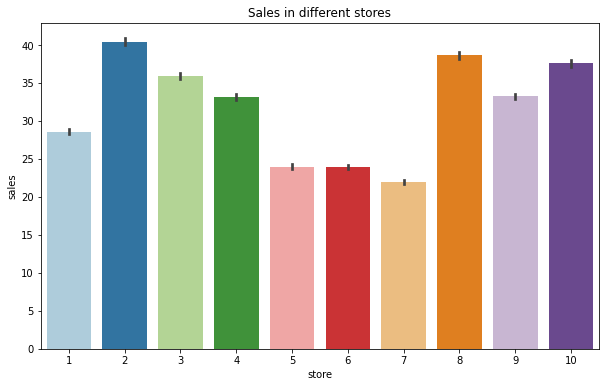

In [18]:
plt.figure(figsize=(10,6))
plt.title("Sales in different stores")
sns.barplot(df['store'],df['sales'],palette='Paired')

Plotting sales of different items 

<AxesSubplot:title={'center':'Sales of different Items'}, xlabel='item', ylabel='sales'>

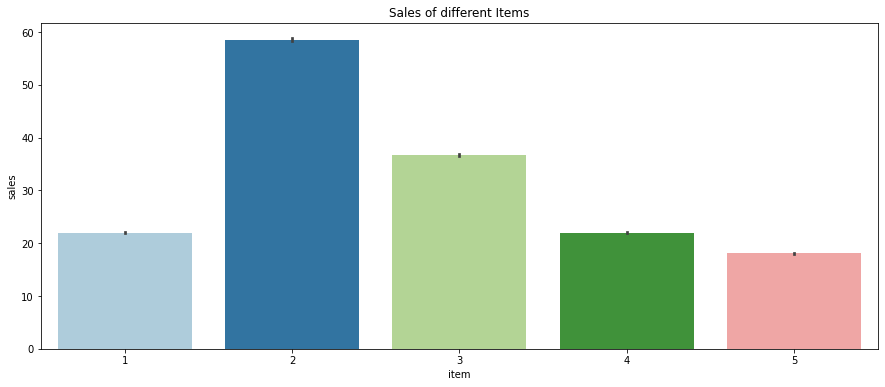

In [19]:
plt.figure(figsize=(15,6))
plt.title("Sales of different Items")
sns.barplot(df['item'],df['sales'],palette='Paired')

Item 2 is the highest sold one

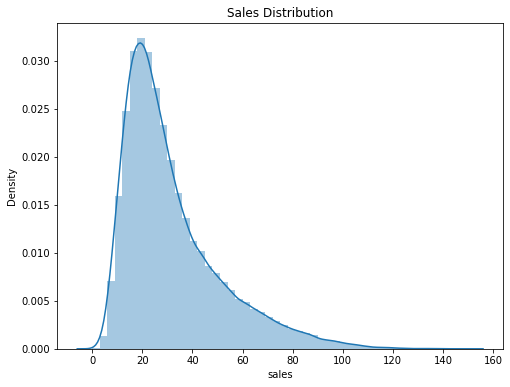

In [20]:
plt.figure(figsize = (8,6))
sns.distplot(df['sales'])
plt.title('Sales Distribution')
plt.show()

From the plot it is clear that the distribution of sales is right skewed

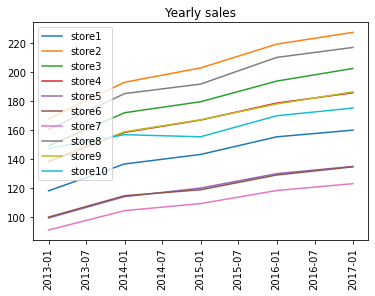

In [21]:
for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_daily=store_sales.groupby("date").agg({"sales":"sum"})
    store_yearly=store_daily.resample(rule='AS').mean()
    plt.title("Yearly sales")
    plt.plot(store_yearly['sales'])
    plt.xticks(rotation=90)
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))

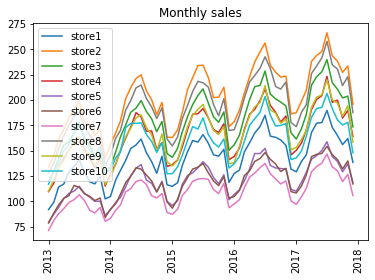

In [22]:
for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_daily=store_sales.groupby("date").agg({"sales":"sum"})
    store_monthly=store_daily.resample(rule='MS').mean()
    plt.title("Monthly sales")
    plt.plot(store_monthly['sales'])
    plt.xticks(rotation=90)
    plt.legend(('store1','store2','store3','store4','store5','store6','store7','store8','store9','store10'))
    

# Finding autocorrelation and partial autocorrelation of the sales column in general

<Figure size 1152x432 with 0 Axes>

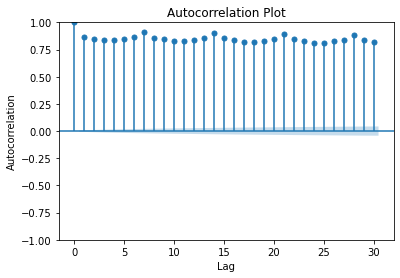

In [23]:
# Select only the sales column
sales_data = df['sales']

# Plot autocorrelation
plt.figure(figsize=(16,6))
plot_acf(sales_data, lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()

The autocorrelation plot shows values above 0.75 for all or most lags, it suggests that there is a strong positive autocorrelation in the data.

<Figure size 1152x432 with 0 Axes>

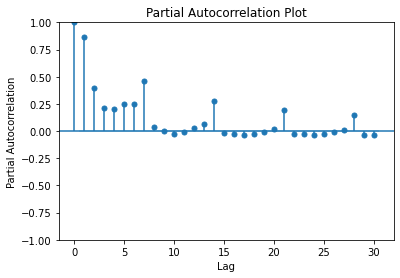

In [24]:
# Plot partial autocorrelation
plt.figure(figsize=(16,6))
plot_pacf(sales_data, lags=30)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Plot')
plt.show()

The partial autocorrelation plot shows a sharp drop-off from 1 to negative values and some positive values in between, it suggests that there is a strong relationship between the values at adjacent time periods, but that this relationship decays quickly as the lag increases.

# Checking Stationarity using AD Fuller Test
We are going to check the hypothesis that if the null hypothesis is true or not

Our hypothesis is ' time series is non stationary '

we are consedering only ITEM 1

In [25]:
x=df[df['item']==1]
z=x.sales
result=adfuller(z)

In [26]:
print('ADF Statistic: %f' % result[0])

ADF Statistic: -7.155320


In [27]:
print('p-value: %f' % result[1])

p-value: 0.000000


In [28]:
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Based on ACF, PACF and stationarity SARIMA or ARIMA is best suit for forecasting the given timeseries. 

# Considering monthly sales for model building

In [29]:
for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_monthly=store_daily.resample(rule='MS').mean()
store_monthly

,sales
date,
2013-01-01,116.903226
2013-02-01,129.285714
2013-03-01,137.032258
2013-04-01,150.166667
2013-05-01,156.290323
2013-06-01,168.066667
2013-07-01,178.129032
2013-08-01,159.387097
2013-09-01,150.866667


<AxesSubplot:xlabel='date'>

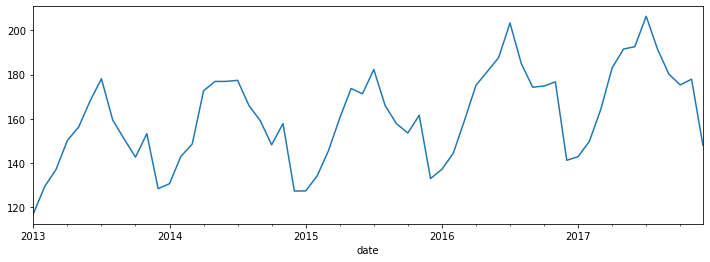

In [30]:
store_monthly['sales'].plot(figsize=(12,4))

From the plot it is understood that the sales follow upward trend and seasonality

<AxesSubplot:xlabel='date'>

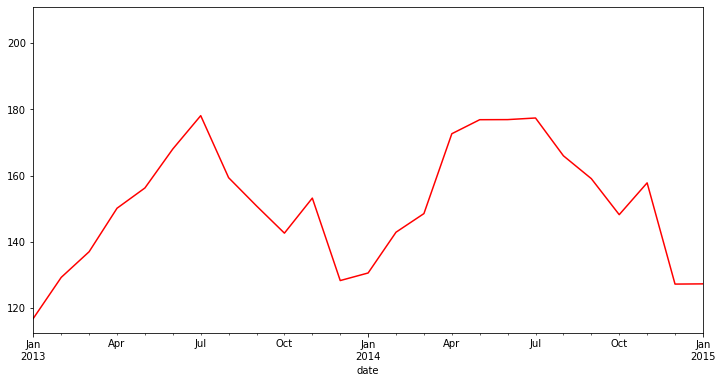

In [31]:
store_monthly['sales'].plot(xlim=['2013-01-01','2015-01-31'],figsize=(12,6),c='red')

July has the highest sales mean

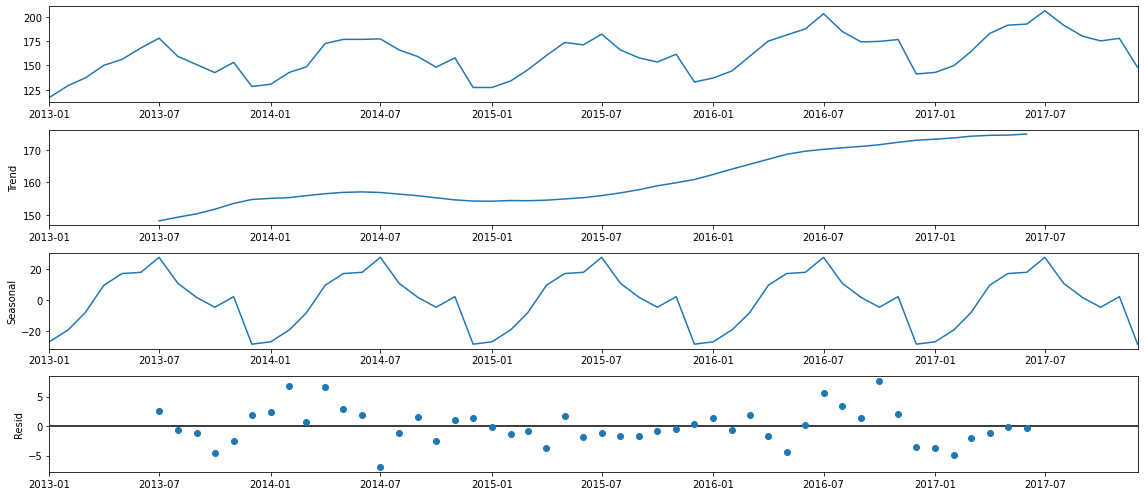

In [32]:
# plotting decomposition plot
rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(store_monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

# ARIMA Model Building 

In [33]:
model=ARIMA(store_monthly,order=(7,14,30))
model_fit=model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                   60
Model:               ARIMA(11, 0, 14)   Log Likelihood                -197.851
Date:                Mon, 13 Mar 2023   AIC                            449.702
Time:                        17:11:13   BIC                            506.250
Sample:                    01-01-2013   HQIC                           471.821
                         - 12-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        161.0823     41.668      3.866      0.000      79.415     242.750
ar.L1          0.3812      1.010      0.378      0.706      -1.598       2.360
ar.L2         -0.1510      1.109     -0.136      0.892      -2.325       2.023
ar.L3          0.1547      1.046      0.148      0.882      -1.896       2.205
ar.L4          0.6919      1.022      0.677      0.498      -1.312       2.695
ar.L5         -0.8469      0.417     -2.032      0.042      -1.664      -0.030
ar.L6          0.4161      0.969      0.429      0.668      -1.483       2.315
ar.L7         -0.6828      0.967     -0.706      0.480      -2.577       1.212
ar.L8          0.2239      1.494      0.150      0.881      -2.704       3.152
ar.L9          0.4980      1.517      0.328      0.743      -2.476       3.472
ar.L10        -0.3146      0.916     -0.344      0.731      -2.109       1.480
ar.L11         0.5425      0.776      0.699      0.485      -0.979       2.064
ma.L1         -0.0058     28.481     -0.000      1.000     -55.828      55.816
ma.L2          0.5471     25.637      0.021      0.983     -49.700      50.794
ma.L3         -0.1107     38.182     -0.003      0.998     -74.945      74.724
ma.L4         -0.2239     39.975     -0.006      0.996     -78.574      78.126
ma.L5          0.7220     36.298      0.020      0.984     -70.421      71.865
ma.L6          0.0972     17.468      0.006      0.996     -34.140      34.334
ma.L7          1.3073     19.104      0.068      0.945     -36.136      38.751
ma.L8          0.0497     25.017      0.002      0.998     -48.983      49.082
ma.L9          0.5228     35.631      0.015      0.988     -69.312      70.358
ma.L10        -0.2496     37.419     -0.007      0.995     -73.590      73.090
ma.L11        -0.1505     41.778     -0.004      0.997     -82.034      81.733
ma.L12         0.8295     39.034      0.021      0.983     -75.676      77.335
ma.L13         0.0034     20.675      0.000      1.000     -40.518      40.525
ma.L14         0.7233     20.515      0.035      0.972     -39.485      40.932
sigma2        20.1962    557.760      0.036      0.971   -1072.993    1113.386
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.31
Prob(Q):                              0.74   Prob(JB):                         0.86
Heteroskedasticity (H):               0.54   Skew:                             0.12
Prob(H) (two-sided):                  0.17   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Prediction

In [34]:
pred = model_fit.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

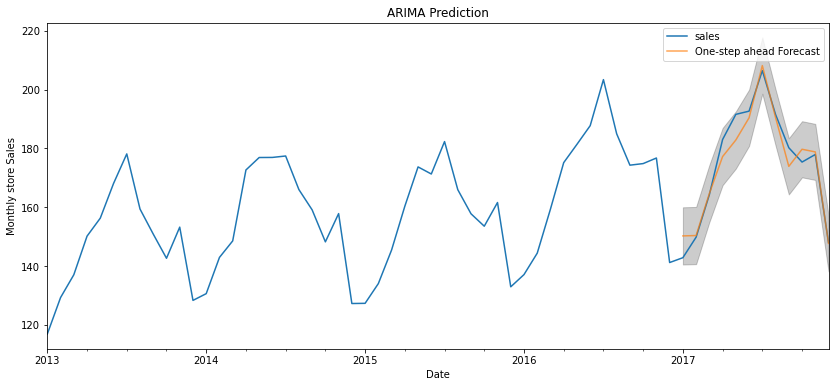

In [35]:
ax = store_monthly['2013':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("ARIMA Prediction")
ax.set_xlabel('Date')
ax.set_ylabel('Monthly store Sales')
plt.legend()
plt.show()

# Checking accuracy of ARIMA model 

In [36]:
forecasted_arima_monthly = pred.predicted_mean
monthly_truth = store_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(monthly_truth,forecasted_arima_monthly)
print('The MSE of forecasts is {}'.format(round(mse, 2)))
print('The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2)))


The MSE of forecasts is 19.53
The RMSE of forecasts is 4.42


# Building SARIMA model

First we need to find the optimum values for the parameters p,q and d for fitting the model

In [37]:
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [38]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(store_monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:770.5406858249465
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:580.9156866244746
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:355.4248828849844
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1517.5059060944482
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:339.5115302880298
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:308.6471069513185
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:271.7357563074393
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1350.1945260823622
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:690.5013567311498
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:516.5376639942662
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:317.4335497355321
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1328.7951481906546
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:316.74701947311246
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:287.96786609296163
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:249.71840749678165
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1236.6482310667484
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:468.29585956915105
SARIMAX(0, 1, 0)x(0, 0,

Lowest AIC : 198.90001390877327
SARIMAX(1, 1, 0)x(1, 1, 0, 12)12 

In [39]:
# Fitting SARIMA Model

from statsmodels.tsa.statespace.sarimax import SARIMAX

model=SARIMAX(store_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -140.843
Date:                            Mon, 13 Mar 2023   AIC                            287.687
Time:                                    17:11:19   BIC                            293.237
Sample:                                01-01-2013   HQIC                           289.775
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1838      0.130     -1.415      0.157      -0.439       0.071
ar.S.L12      -0.4156      0.123     -3.392      0.001      -0.656      -0.175
sigma2        22.3387      5.171      4.320      0.000      12.204      32.473
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):                 0.13
Prob(Q):                              0.75   Prob(JB):                         0.94
Heteroskedasticity (H):               0.38   Skew:                             0.12
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

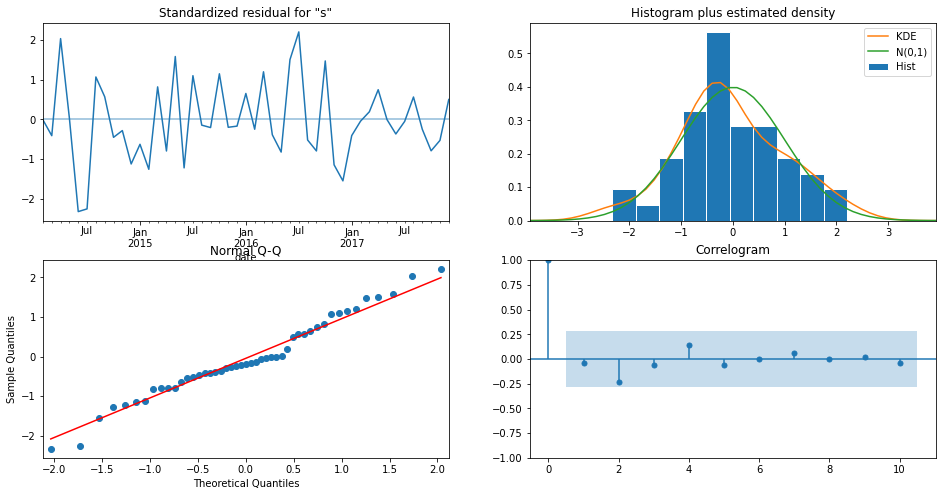

In [40]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

# Forecasting using SARIMA

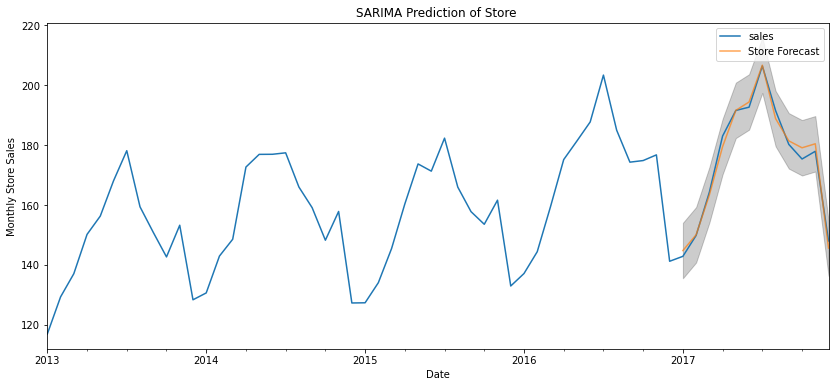

In [41]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = store_monthly['2013':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'Store Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1], color = 'k', alpha = .2)

plt.title("SARIMA Prediction of Store ")
ax.set_xlabel('Date')
ax.set_ylabel('Monthly Store Sales')
plt.legend()
plt.show()

# Checking accuracy of SARIMA model 

In [42]:

forecasted_sarima_monthly = pred.predicted_mean
monthly_truth = store_monthly['2017-01-01':]

from sklearn.metrics import mean_squared_error,mean_absolute_error
mse = mean_squared_error(monthly_truth,forecasted_sarima_monthly)
print('The MSE of forecasts is {}'.format(round(mse, 2)))
print('The RMSE of forecasts is {}'.format(round(np.sqrt(mse), 2)))



The MSE of forecasts is 4.56
The RMSE of forecasts is 2.13


Comparing accuracy level of ARIMA and SARIMA models, SARIMA model turns out to be the best of the two models

#  Forecasting sales of different stores using SARIMA model

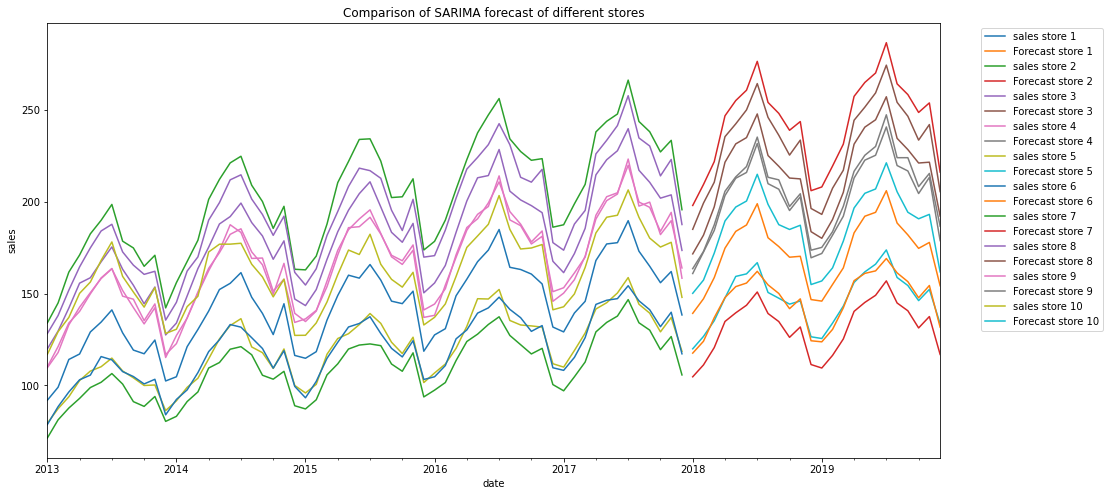

In [43]:
for i in df['store'].unique():
    store_sales=df[df['store']==i]
    store_daily=store_sales.groupby("date").agg({"sales":"sum"})
    store_monthly=store_daily.resample(rule='MS').mean()
    model=SARIMAX(store_monthly,order=(1,1,0),seasonal_order=(1,1,0,12))
    results = model.fit()
    pred = results.get_forecast(steps = 24)
    retail = pd.DataFrame(pred.predicted_mean)
    plt.title('Forecasting sales of different stores using SARIMA model')
    store_monthly['sales'].plot(figsize=(16,8),label='sales store '+str(i))
    retail['predicted_mean'].plot(figsize=(16,8),label='Forecast store '+str(i))
    plt.ylabel('sales')
    plt.legend(bbox_to_anchor=(1.04, 1))
   